In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing

import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering, KMeans

from sklearn.metrics import silhouette_score


In [69]:
customer_data = pd.read_csv("shopping_data.csv")

In [70]:
customer_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [71]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [72]:
data = customer_data.iloc[:,2:]
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


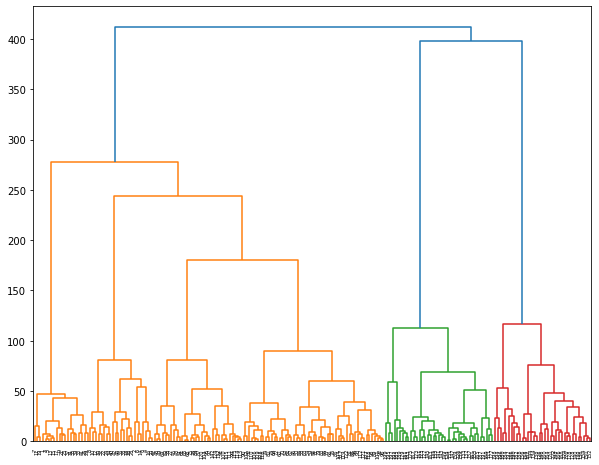

In [73]:
plt.figure(figsize=(10,8))
dend = shc.dendrogram(shc.linkage(data, method = 'ward'))

In [74]:
# Using agglomerative clustering

cluster = AgglomerativeClustering(n_clusters = 5)
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [75]:
# data[:,0]

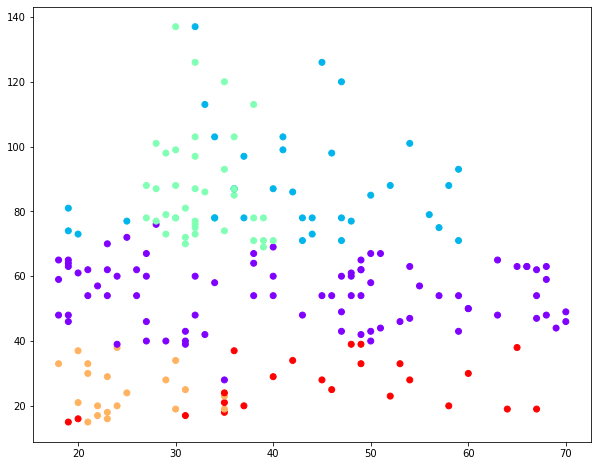

In [76]:
plt.figure(figsize=(10,8))
plt.scatter(data.iloc[:,0], data.iloc[:,1], c = cluster.labels_, cmap = 'rainbow')

#### K Means Clustering

In [77]:
dataset = pd.read_csv('Cust_Spend_Data.csv')
dataset

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


In [78]:
dataset.describe()

,Cust_ID,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
count,10.00000,10.000000,10.000000,10.000000,10.0000,10.00000
mean,5.50000,4850.000000,4.000000,0.300000,4.3000,4.00000
std,3.02765,2877.595447,1.699673,0.483046,4.6916,3.05505
min,1.00000,1000.000000,2.000000,0.000000,1.0000,0.00000
25%,3.25000,2500.000000,3.000000,0.000000,1.0000,2.00000
50%,5.50000,5000.000000,3.500000,0.000000,1.5000,3.50000
75%,7.75000,6875.000000,5.000000,0.750000,8.2500,6.25000
max,10.00000,10000.000000,7.000000,1.000000,12.0000,9.00000


In [79]:
dataset1 = dataset

In [80]:
#Feature Scaling

data = dataset1.iloc[:,2:]
dataset1_standardized = preprocessing.scale(data)
dataset1_standardized = pd.DataFrame(dataset1_standardized)
dataset1_standardized

,0,1,2,3,4
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


##### WSS Plot or Elbow Curve for Optimal number of clusters identification

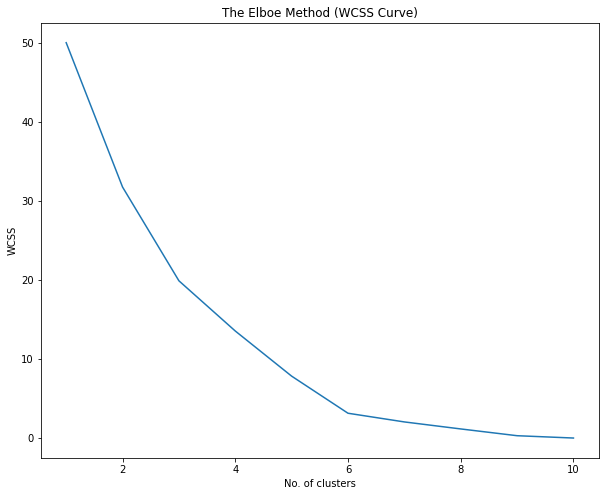

In [81]:
plt.figure(figsize=(10,8))
wcss = []

for i in range(1,11):
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset1_standardized)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('The Elboe Method (WCSS Curve)')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

In [87]:
# Initialising KMeans from the prescribed number of clusters from wcss curve
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 45)

#fitting and predicting on the dataset
y_kmeans = kmeans.fit_predict(dataset1_standardized)

#I want to start the clusters with 1 instead of 0
y_kmeans = y_kmeans+1


#Creating a dataframe of cluster and then adding that to original dataframe to see the cluster of each row
cluster = pd.DataFrame(y_kmeans)
dataset1['cluster'] = cluster

#Getting cluster summary by grouping by cluster
cluster_summary = pd.DataFrame(round(dataset1.groupby('cluster').mean(),1))

cluster_summary

,Cust_ID,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
cluster,,,,,,
1,3.5,6750.0,6.0,1.0,2.0,4.0
2,8.0,2500.0,3.5,0.0,1.0,7.5
3,6.0,4250.0,5.5,0.0,11.5,2.5
4,1.0,10000.0,2.0,1.0,1.0,0.0
5,8.5,2250.0,2.5,0.0,1.5,1.5
6,2.0,7000.0,3.0,0.0,10.0,9.0


##### Silhoutte score

In [88]:
from sklearn.metrics import silhouette_score
silh_score = silhouette_score(dataset1_standardized, y_kmeans)
silh_score

0.41933496838219336

#Assignment

- use gender column after encoding in agglomerative clustering and see the result
- score agglomerative clustering result as well
- KMeans clusters needs to be plotted
- Ply with different values of n_clusters and see the silhouette score for each.